In [1]:
# import packages and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


bace = pd.read_csv('./bace_cleaned.csv')

The first round of feature engineering relied on correlation to the label to select features to keep. With a positive correlation threshold of 0.3 and a negative correlation threshold of -0.2, around 30 features were identified. Many of these features were highly correlated to one another, so were consolidated into new features representing the sum of the consolidated features. These new features were also highly correlated to one another, so the objective of this feature engineering round is to include some features that are more independent of the previous features, even if they're not strongly correlated to the label

In [2]:
# import features from round one

fe_01 = pd.read_csv('./feature_engineering_01.csv')
fe_01.head()

,Class,Estate,Polarity (Pol),Quadratic (QIndex),Pogliani (Pog),Ramification (Ram),Maximal electrotopological positive variation (MEPV),Reciprocal hyper-distance-path index (RHDPI),Kier Hall electronegativity (KHE),reciprocal distance square Randic-type index (RDSR),E-state topological parameter (ETP),Mean Square Distance Balaban (MSDB),zagreb_combined,topo_combined,connectivity_combined
0,1.0,0.174508,0.302158,0.454545,0.233503,0.31250,0.696658,0.252091,0.201878,0.203785,0.178765,0.411900,0.247818,0.300840,0.316908
1,1.0,0.365891,0.446043,0.545455,0.418782,0.43750,0.930443,0.429520,0.403756,0.378031,0.374830,0.056775,0.411286,0.454943,0.465831
2,1.0,0.291066,0.460432,0.590909,0.346024,0.40625,0.845334,0.378622,0.315076,0.325681,0.296359,0.189911,0.353679,0.417775,0.481669
3,1.0,0.355297,0.388489,0.522727,0.351100,0.43750,0.821703,0.340348,0.362024,0.283948,0.362166,0.285909,0.363725,0.451764,0.392715
4,1.0,0.369542,0.489209,0.659091,0.384095,0.46875,0.840258,0.404084,0.366719,0.349794,0.376753,0.185498,0.419414,0.475961,0.499280


It's important to note that the fe_01 data has already been normalised. 

From the model validation, we know that the Maximal electrotopological positive variation (MEPV) feature was the highest importance. Let's examine which features show the lowest correlation to MEPV

In [54]:
bace.drop(['canvasUID'], axis=1, inplace=True)

In [55]:
import fastcluster

corr_mat = bace.corr()

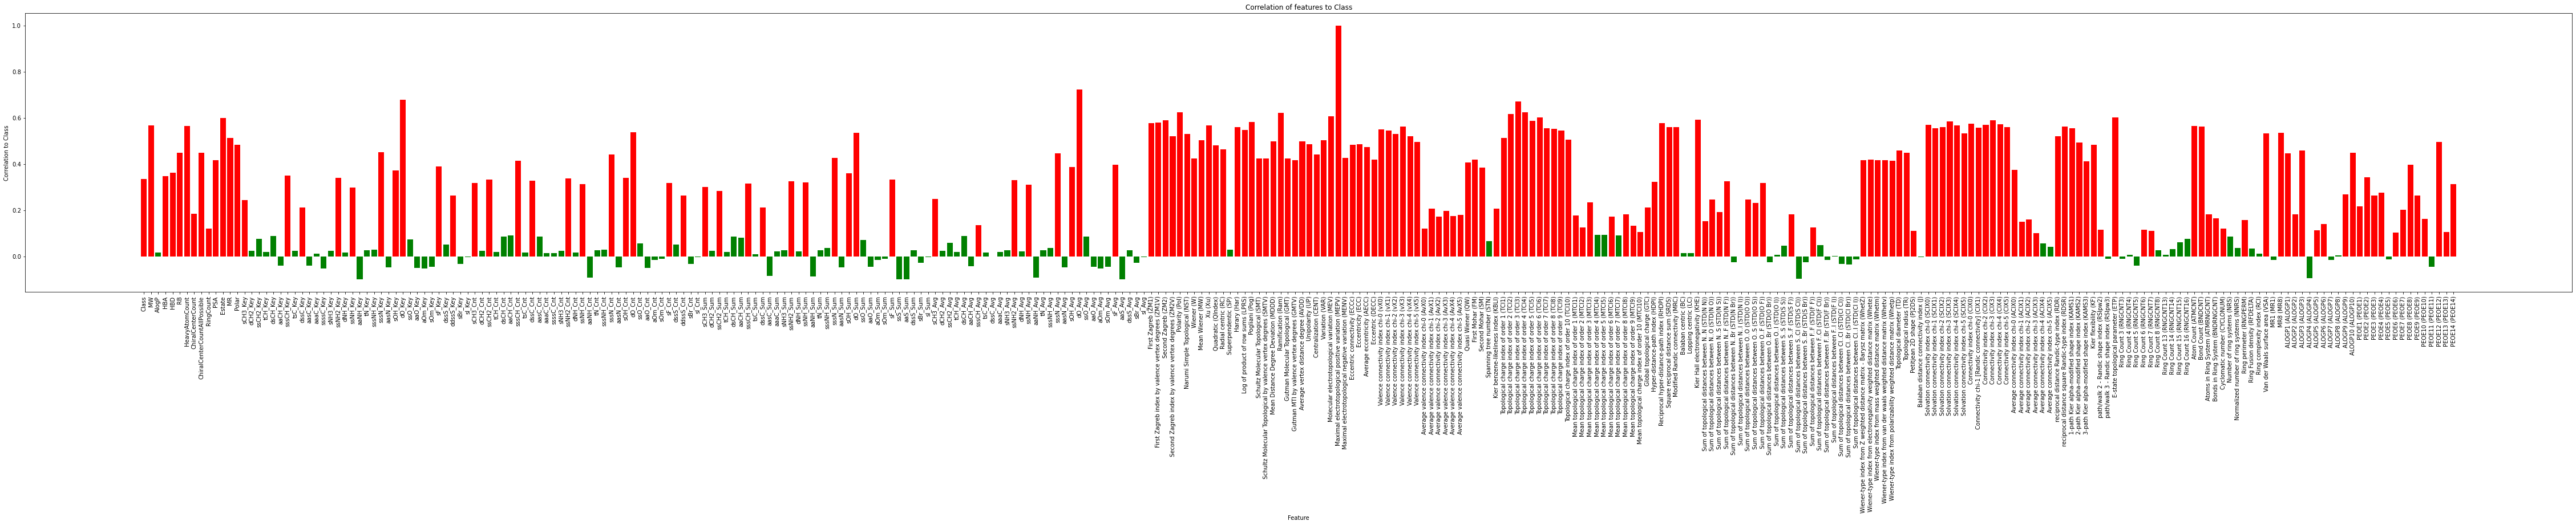

In [56]:
x = corr_mat.columns
y = corr_mat['Maximal electrotopological positive variation (MEPV)']

mask1 = y > -0.1
mask2 = y >= 0.1


plt.figure(figsize=(80,9))

plt.bar(x[mask1], y[mask1], color = 'Green')
plt.bar(x[mask2], y[mask2], color = 'Red')


plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Correlation to Class")
plt.title("Correlation of features to Class")

plt.show()

In [72]:
target_features = corr_mat['Maximal electrotopological positive variation (MEPV)'].mask(corr_mat['Maximal electrotopological positive variation (MEPV)'] > 0.1)

target_features.dropna(inplace=True)

features_list = target_features.index.tolist()
if 'Class' not in features_list:
    features_list.append('Class')
print(features_list, len(features_list))



['AlogP', 'dCH2_Key', 'ssCH2_Key', 'tCH_Key', 'dsCH_Key', 'aaCH_Key', 'tsC_Key', 'aasC_Key', 'aaaC_Key', 'ssssC_Key', 'sNH3_Key', 'sNH2_Key', 'dNH_Key', 'aaNH_Key', 'tN_Key', 'sssNH_Key', 'dsN_Key', 'aaN_Key', 'aasN_Key', 'ssO_Key', 'aaO_Key', 'aOm_Key', 'sOm_Key', 'ssS_Key', 'aaS_Key', 'dssS_Key', 'sCl_Key', 'sBr_Key', 'sI_Key', 'dCH2_Cnt', 'tCH_Cnt', 'dsCH_Cnt', 'aaCH_Cnt', 'tsC_Cnt', 'aasC_Cnt', 'aaaC_Cnt', 'ssssC_Cnt', 'sNH3_Cnt', 'sNH2_Cnt', 'dNH_Cnt', 'aaNH_Cnt', 'tN_Cnt', 'sssNH_Cnt', 'dsN_Cnt', 'aaN_Cnt', 'aasN_Cnt', 'ssO_Cnt', 'aaO_Cnt', 'aOm_Cnt', 'sOm_Cnt', 'ssS_Cnt', 'aaS_Cnt', 'dssS_Cnt', 'sCl_Cnt', 'sBr_Cnt', 'sI_Cnt', 'dCH2_Sum', 'tCH_Sum', 'dsCH_Sum', 'aaCH_Sum', 'tsC_Sum', 'aasC_Sum', 'aaaC_Sum', 'ssssC_Sum', 'sNH3_Sum', 'sNH2_Sum', 'dNH_Sum', 'aaNH_Sum', 'tN_Sum', 'sssNH_Sum', 'dsN_Sum', 'aaN_Sum', 'aasN_Sum', 'ssO_Sum', 'aaO_Sum', 'aOm_Sum', 'sOm_Sum', 'ssS_Sum', 'aaS_Sum', 'dssS_Sum', 'ddssS_Sum', 'sCl_Sum', 'sBr_Sum', 'sI_Sum', 'dCH2_Avg', 'ssCH2_Avg', 'tCH_Avg', '

let's check the correlations of these features to class and choose the top 5

In [74]:
low_correl = bace[features_list]

target_corrs = low_correl.corr()

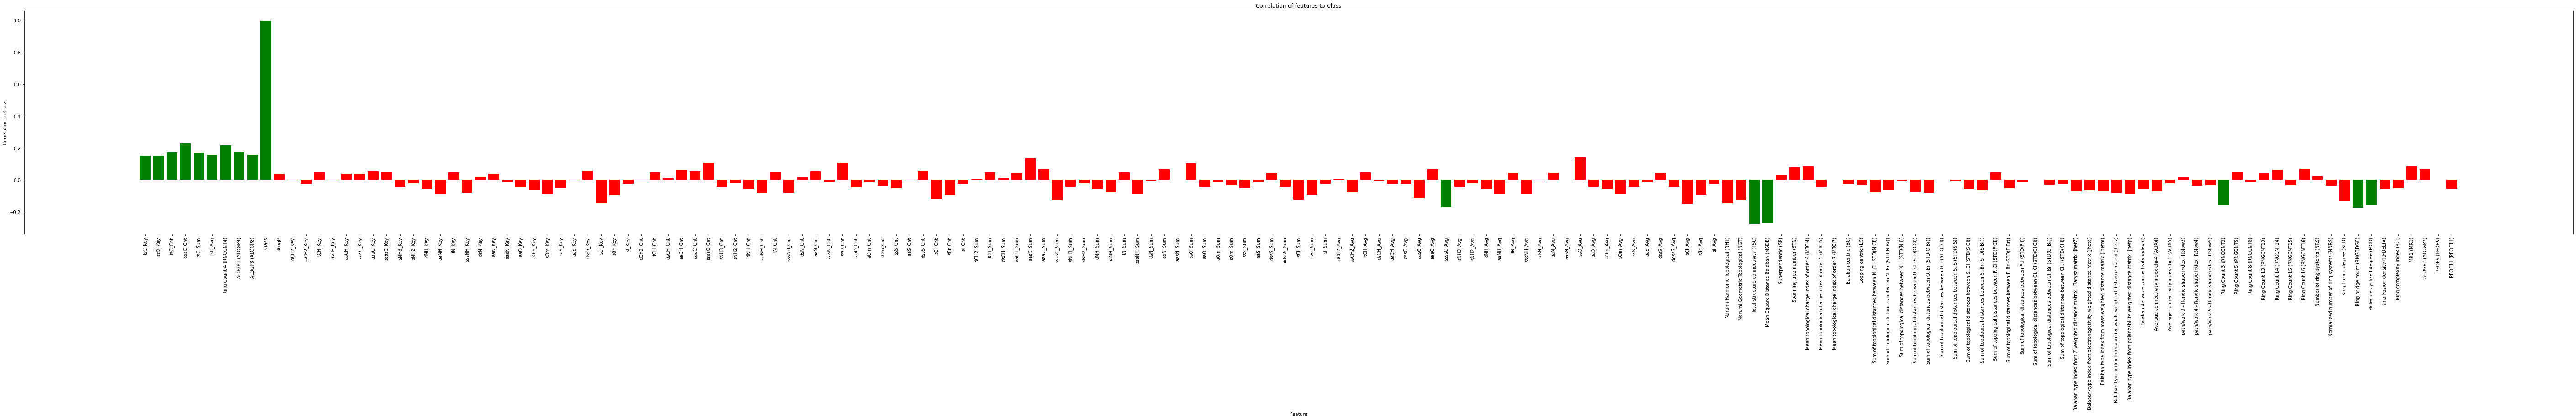

In [77]:
x = target_corrs.columns
y = target_corrs['Class']

mask1 = y >= 0.15
mask2 = y < 0.15
mask3 = y <= -0.15

plt.figure(figsize=(100,9))

plt.bar(x[mask1], y[mask1], color = 'Green')
plt.bar(x[mask2], y[mask2], color = 'Red')
plt.bar(x[mask3], y[mask3], color = 'Green')

plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Correlation to Class")
plt.title("Correlation of features to Class")

plt.show()

In [78]:
pos_features = target_corrs['Class'].where(target_corrs['Class'] >= 0.15)
neg_features = target_corrs['Class'].where(target_corrs['Class'] <= -0.15)

pos_features.dropna(inplace=True)
neg_features.dropna(inplace=True)

features = pd.concat([pos_features, neg_features], axis=0)
features_list = features.index.tolist()
print(features_list, len(features_list))

['tsC_Key', 'ssO_Key', 'tsC_Cnt', 'aasC_Cnt', 'tsC_Sum', 'tsC_Avg', 'Ring Count 4 (RNGCNT4)', 'ALOGP4 (ALOGP4)', 'ALOGP8 (ALOGP8)', 'Class', 'ssssC_Avg', 'Total structure connectivity (TSC)', 'Mean Square Distance Balaban (MSDB)', 'Ring Count 3 (RNGCNT3)', 'Ring bridge count (RNGBDGE)', 'Molecule cyclized degree (MCD)'] 16


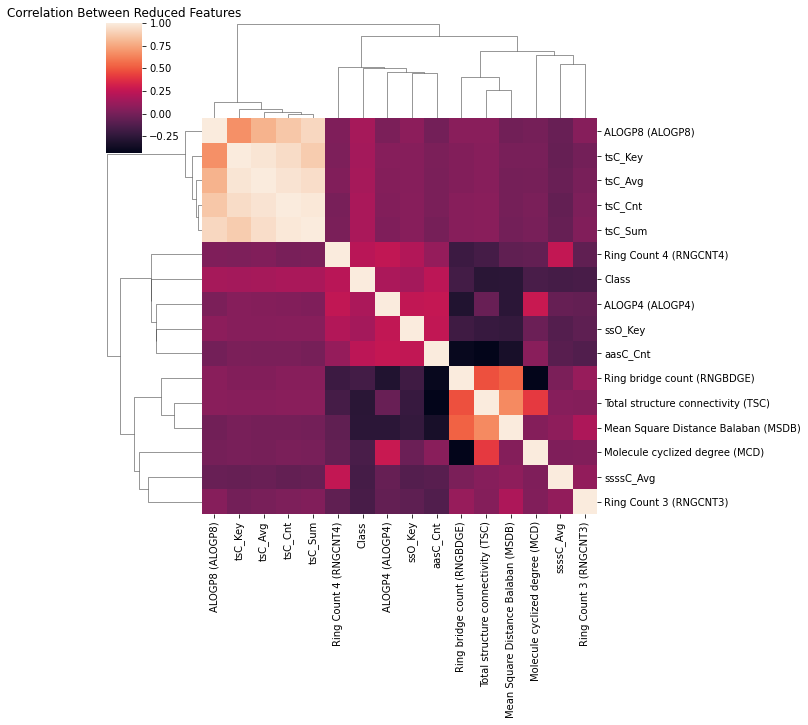

In [99]:
new_features = bace[features_list].copy()

new_corr = new_features.corr()

sns.clustermap(new_corr)
plt.title("Correlation Between Reduced Features")
plt.show()

We have identified 15 additional features with low correlation to MEPV that maintain reasonable correlation to class. With the exception of five features, these new features are generally weakly correlated to one another, which should increase the sensitivity of the models. We will combine the five features that are highly correlated into one feature, then add the three most important features from round 1 of feature engineering to create the feature list for round 2. 

In [100]:
combine_list = [
    'ALOGP8 (ALOGP8)',
    'tsC_Key',
    'tsC_Avg',
    'tsC_Cnt',
    'tsC_Sum',
]

for i in combine_list:
    if 'tsc_combined' in new_features.columns:
        new_features['tsc_combined'] += new_features[i]
    else:
        new_features['tsc_combined'] = new_features[i]


In [101]:
for i in combine_list:
    new_features.drop(i, axis=1, inplace=True)
    
new_features.head()

,ssO_Key,aasC_Cnt,Ring Count 4 (RNGCNT4),ALOGP4 (ALOGP4),Class,ssssC_Avg,Total structure connectivity (TSC),Mean Square Distance Balaban (MSDB),Ring Count 3 (RNGCNT3),Ring bridge count (RNGBDGE),Molecule cyclized degree (MCD),tsc_combined
0,1,5,0,0.000000,1,1.5151,0.209567,0.240719,0,-20,0.687500,0.0
1,1,4,0,0.000000,1,0.7502,0.176732,0.181466,0,-18,0.468085,0.0
2,1,6,0,20.673861,1,0.0000,0.181895,0.203680,0,-30,0.595238,0.0
3,1,6,0,9.751966,1,-1.1468,0.197866,0.219697,0,-15,0.450000,0.0
4,0,6,0,10.921895,1,-3.8731,0.179845,0.202943,0,-30,0.568182,0.0


In [103]:
new_features.shape

(1513, 12)

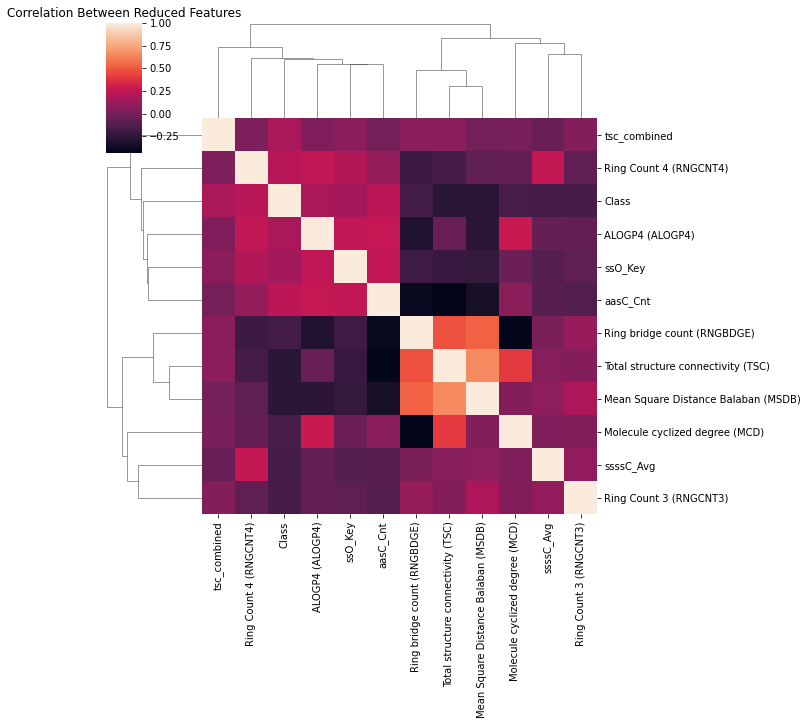

In [104]:
corrs = new_features.corr()

sns.clustermap(corrs)
plt.title("Correlation Between Reduced Features")
plt.show()

In [109]:
important_features = [
    'Maximal electrotopological positive variation (MEPV)',
    'topo_combined',
    'zagreb_combined',
    'connectivity_combined',
    ]

retained_features = fe_01[important_features].copy()

combined_features = pd.concat([new_features, retained_features], axis=1)
    
combined_features.head()

,ssO_Key,aasC_Cnt,Ring Count 4 (RNGCNT4),ALOGP4 (ALOGP4),Class,ssssC_Avg,Total structure connectivity (TSC),Mean Square Distance Balaban (MSDB),Ring Count 3 (RNGCNT3),Ring bridge count (RNGBDGE),Molecule cyclized degree (MCD),tsc_combined,Maximal electrotopological positive variation (MEPV),topo_combined,zagreb_combined,connectivity_combined
0,1,5,0,0.000000,1,1.5151,0.209567,0.240719,0,-20,0.687500,0.0,0.696658,0.300840,0.247818,0.316908
1,1,4,0,0.000000,1,0.7502,0.176732,0.181466,0,-18,0.468085,0.0,0.930443,0.454943,0.411286,0.465831
2,1,6,0,20.673861,1,0.0000,0.181895,0.203680,0,-30,0.595238,0.0,0.845334,0.417775,0.353679,0.481669
3,1,6,0,9.751966,1,-1.1468,0.197866,0.219697,0,-15,0.450000,0.0,0.821703,0.451764,0.363725,0.392715
4,0,6,0,10.921895,1,-3.8731,0.179845,0.202943,0,-30,0.568182,0.0,0.840258,0.475961,0.419414,0.499280


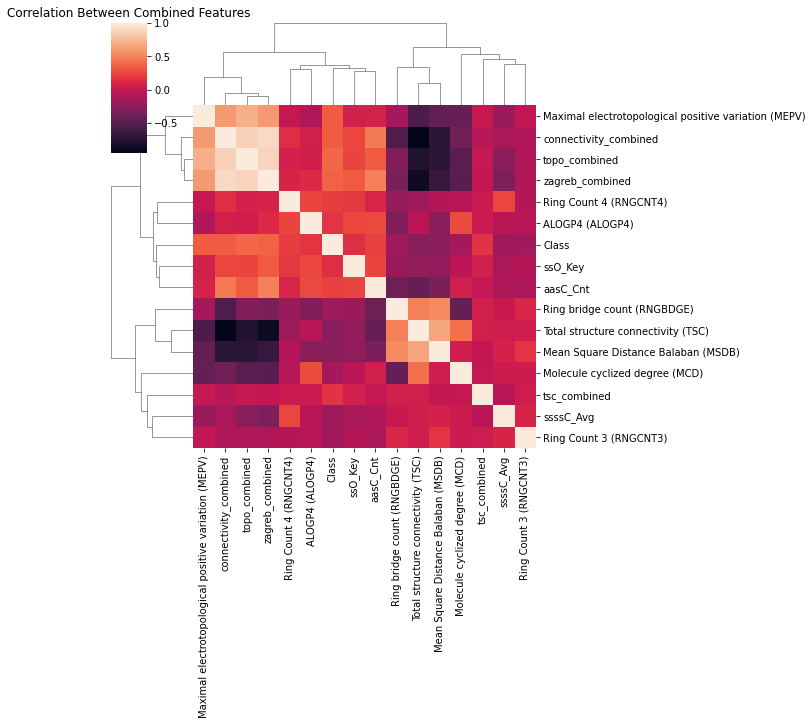

In [110]:
combined_corrs = combined_features.corr()

sns.clustermap(combined_corrs)
plt.title("Correlation Between Combined Features")
plt.show()

Comparing the above correlation matrix to the matrix from the round one features, it is clear that these features are much less dependent. 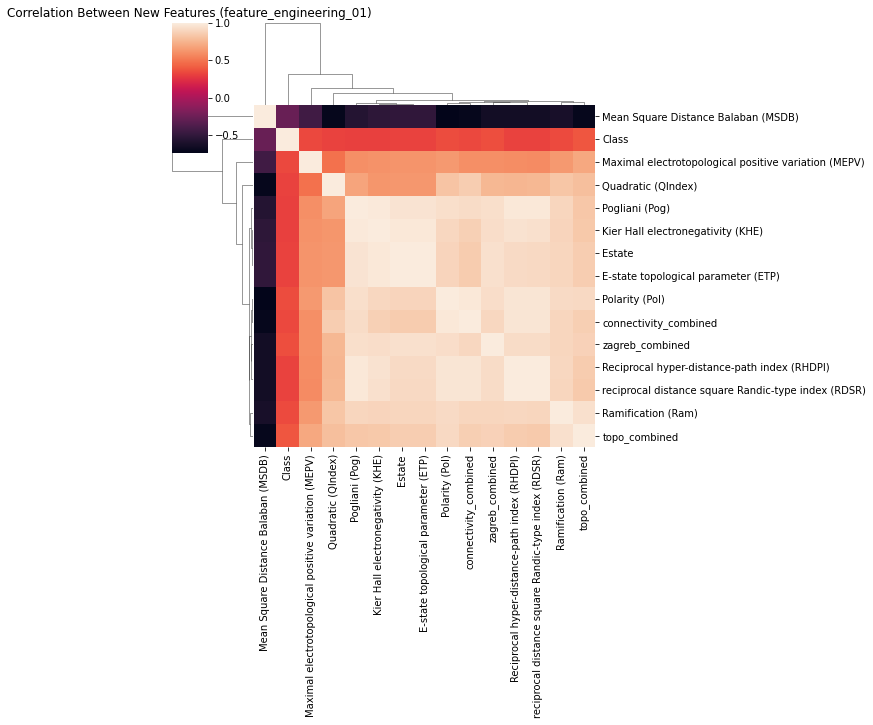

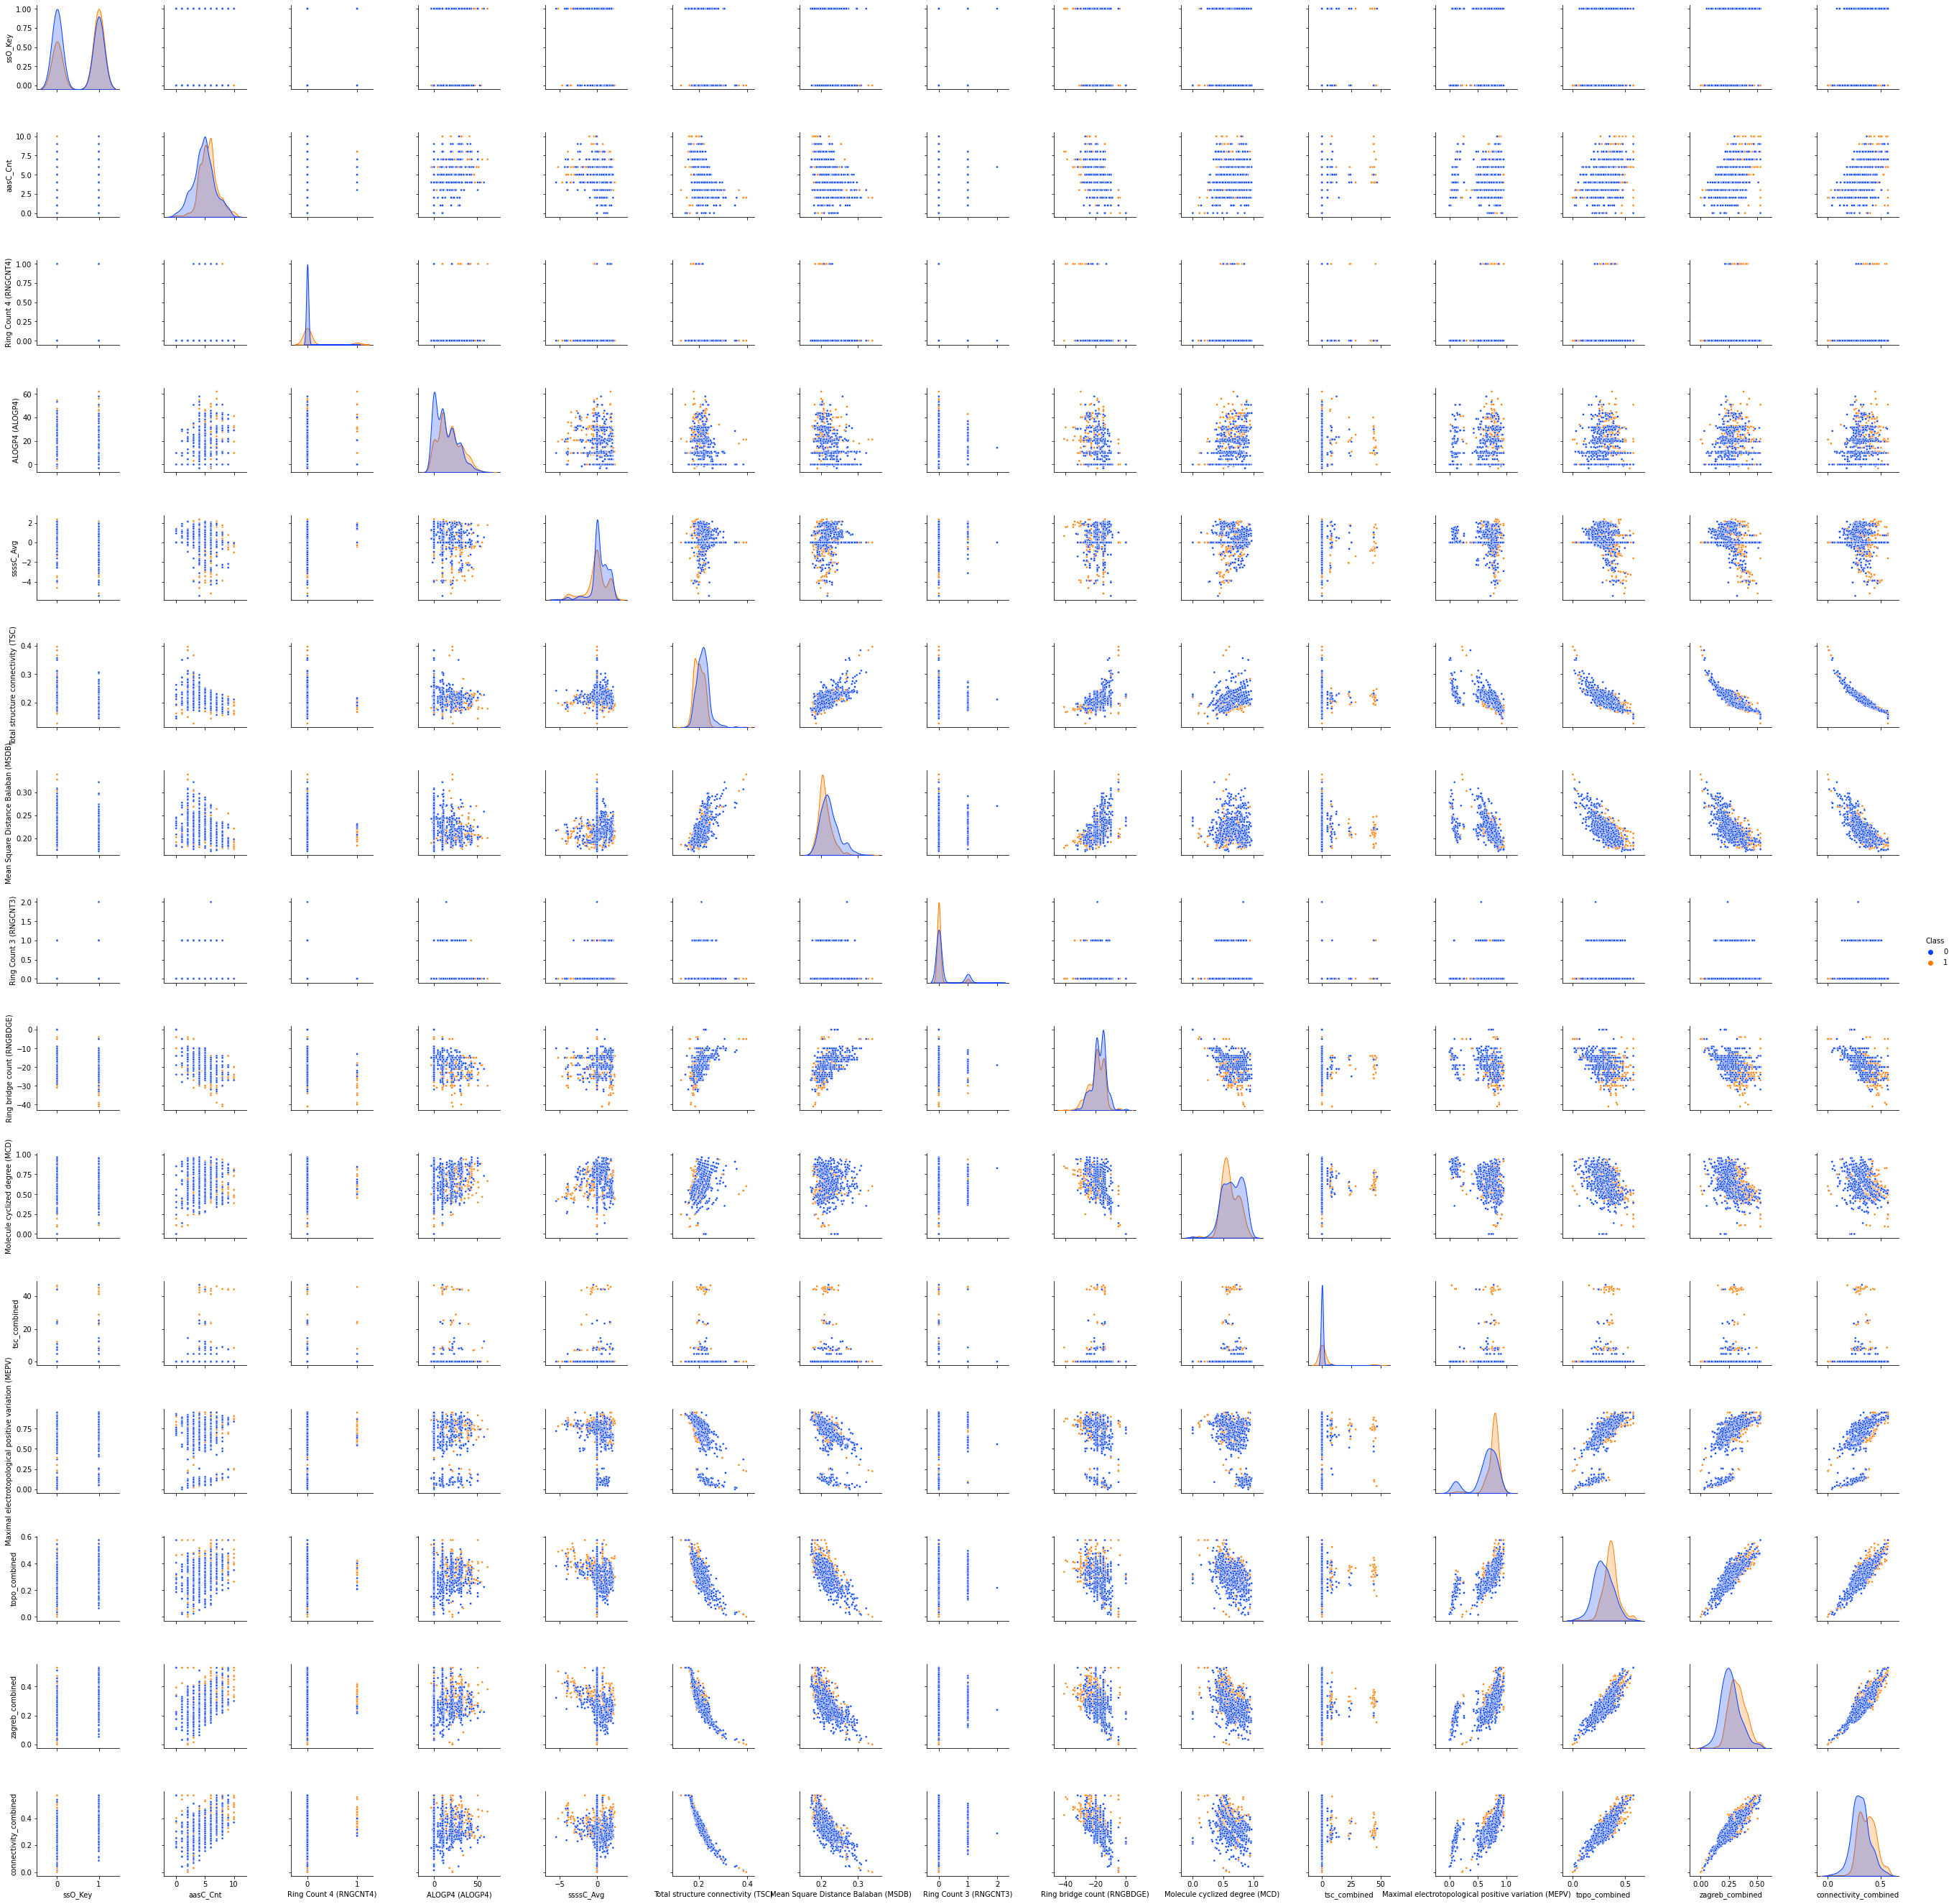

In [119]:
sns.pairplot(combined_features, diag_kind = "kde", markers = '.', hue = "Class", palette='bright')

plt.show()

Let's normalise and export the data for the second round of model training

In [111]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

min_max = scaler.fit_transform(combined_features)

combined_features_norm = pd.DataFrame(min_max, columns=combined_features.columns)

combined_features_norm.head()

,ssO_Key,aasC_Cnt,Ring Count 4 (RNGCNT4),ALOGP4 (ALOGP4),Class,ssssC_Avg,Total structure connectivity (TSC),Mean Square Distance Balaban (MSDB),Ring Count 3 (RNGCNT3),Ring bridge count (RNGBDGE),Molecule cyclized degree (MCD),tsc_combined,Maximal electrotopological positive variation (MEPV),topo_combined,zagreb_combined,connectivity_combined
0,1.0,0.5,0.0,0.049637,1.0,0.889824,0.308794,0.411900,0.0,0.512195,0.712963,0.0,0.734005,0.522514,0.467385,0.556219
1,1.0,0.4,0.0,0.049637,1.0,0.791980,0.187481,0.056775,0.0,0.560976,0.485422,0.0,0.980323,0.790167,0.775683,0.817599
2,1.0,0.6,0.0,0.366425,1.0,0.696015,0.206557,0.189911,0.0,0.268293,0.617284,0.0,0.890651,0.725612,0.667037,0.845397
3,1.0,0.6,0.0,0.199067,1.0,0.549319,0.265563,0.285909,0.0,0.634146,0.466667,0.0,0.865754,0.784645,0.685984,0.689271
4,0.0,0.6,0.0,0.216994,1.0,0.200576,0.198981,0.185498,0.0,0.268293,0.589226,0.0,0.885303,0.826673,0.791014,0.876308


In [117]:
from sklearn.model_selection import train_test_split

def export_files(dataset, label, round_num, test_size, val_size):
    features = dataset.drop(label, axis=1)
    labels = pd.DataFrame(dataset, columns=[label])
    
    x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=test_size) # training set
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=42, test_size=val_size) # splits remaining into val and test
    
    # export datasets
    dataset.to_csv(f'./feature_engineering_{round_num}.csv', index=False)
    x_train.to_csv(f'./x_train_features_{round_num}.csv', index=False)
    x_val.to_csv(f'./x_val_features_{round_num}.csv', index=False)    
    x_test.to_csv(f'./x_test_features_{round_num}.csv', index=False)

    y_train.to_csv(f'./y_train_labels_{round_num}.csv', index=False)
    y_val.to_csv(f'./y_val_labels_{round_num}.csv', index=False)
    y_test.to_csv(f'./y_test_labels_{round_num}.csv', index=False)
    
    print('files exported')

In [118]:
export_files(combined_features_norm, 'Class', '02', 0.4, 0.5)

files exported
